In [14]:
import trips
import tweetdf
import importlib
import odm

In [29]:
tweets = tweetdf.from_csv("./../../dbs/Sweden-short.csv")
tweets.shape

(99999, 9)

In [32]:
# Top geo users
tusercount = tweets.groupby('userid').size()
tusercount.sort_values(ascending = False).head()

userid
108858455    2121
72274311     1420
15946712     1293
33554184     1195
265631592    1153
dtype: int64

In [33]:
# tweets -> Trips 
importlib.reload(trips)
trips_12h = trips.from_dfs(tweets)
trips_12h.shape

(57241, 10)

In [34]:
trips_12h.head()

,userid,tweetid_o,tweetid_d,createdat_o,createdat_d,latitude_o,longitude_o,latitude_d,longitude_d,traveltime
0,91627942,24373283508,24393675409,2010-09-13 13:13:41+02:00,2010-09-13 17:47:25+02:00,55.705907,13.192397,55.700656,13.195653,04:33:44
1,11773412,24416046138,24421764421,2010-09-13 17:21:37-04:00,2010-09-13 18:47:41-04:00,39.942592,-75.157083,40.124210,-74.962517,01:26:04
2,46051534,24465243051,24468813981,2010-09-14 12:50:03+02:00,2010-09-14 13:57:08+02:00,59.507814,17.915495,59.507758,17.915277,01:07:05
3,18192787,24485683569,24485729544,2010-09-14 17:35:20+02:00,2010-09-14 17:35:53+02:00,59.628170,17.861613,59.628170,17.861613,00:00:33
4,11773412,24492206111,24493827065,2010-09-14 12:55:10-04:00,2010-09-14 13:15:57-04:00,39.949100,-75.149200,39.950115,-75.150218,00:20:47


In [35]:
# Trips -> ODM
importlib.reload(odm)
ODM_b = odm.from_trips(trips_12h)
ODM_b.head()

,latitude_o,longitude_o,latitude_d,longitude_d,count
0,-37.822573,144.969759,-37.818180,144.967874,1
1,-37.765475,144.999465,-37.768194,144.995987,1
2,-34.911528,-57.953708,-34.911027,-57.932324,1
3,-34.911027,-57.932324,-34.911027,-57.932324,1
4,-34.639583,-58.361337,-34.639561,-58.361317,1


In [36]:
## Select one user's trips
usertrips = trips_12h[trips_12h.userid == 18192787]
usertrips.shape


(586, 10)

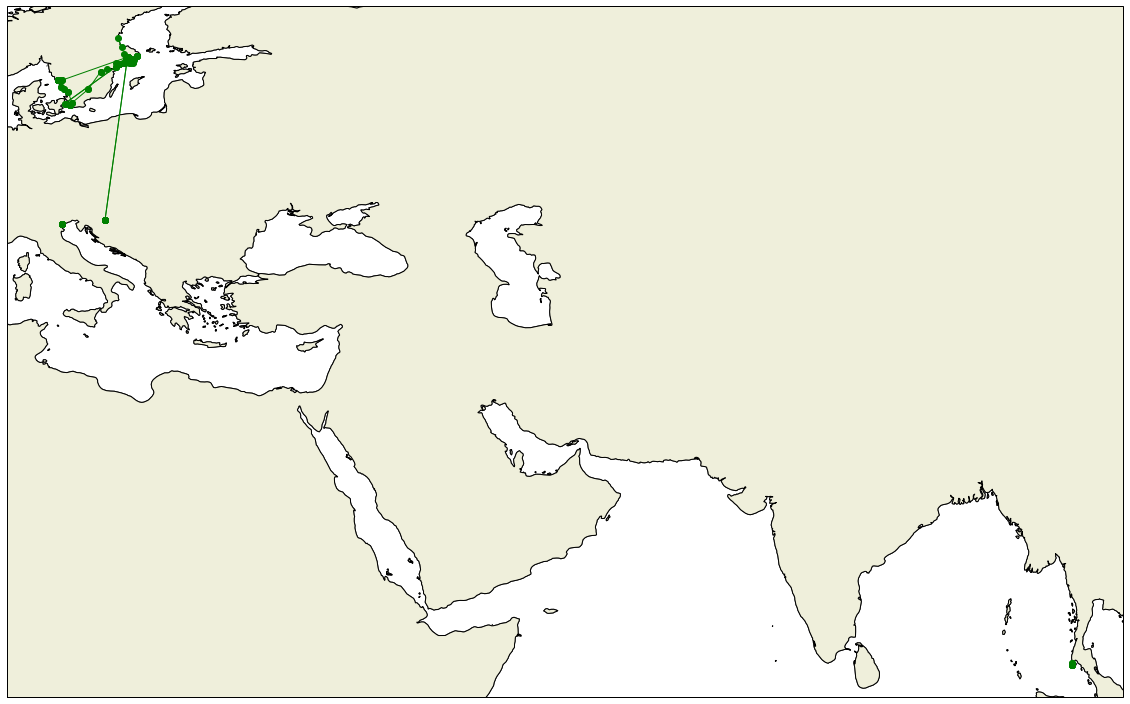

In [37]:
# Plot the user's trips
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()
#ax.set_extent([0, 30, 90, 50], crs=ccrs.PlateCarree())
#ax.set_global()
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cartopy.feature.COLORS['land'])
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
#ax.add_feature(cartopy.feature.LAND, zorder=1)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
for _, row in usertrips.iterrows():
    #if row.type == "missed":
    #    ax.scatter(row.longitude_o, row.latitude_o, c="red", marker='o')
    #elif row.type == "infered":
    #    ax.plot([row.longitude_o,row.longitude_d], [row.latitude_o, row.latitude_d], linewidth=1, marker='o', color='blue', transform=ccrs.PlateCarree())
    #else:
        ax.plot([row.longitude_o,row.longitude_d], [row.latitude_o, row.latitude_d], linewidth=1, marker='o', color='green', transform=ccrs.PlateCarree())
plt.show()

In [40]:
# Extract trips using "infer"
importlib.reload(trips)
trips_infer = trips.from_dfs_with_morning_infer(tweets)
usertrips_infer = trips_infer[trips_infer.userid == 18192787]


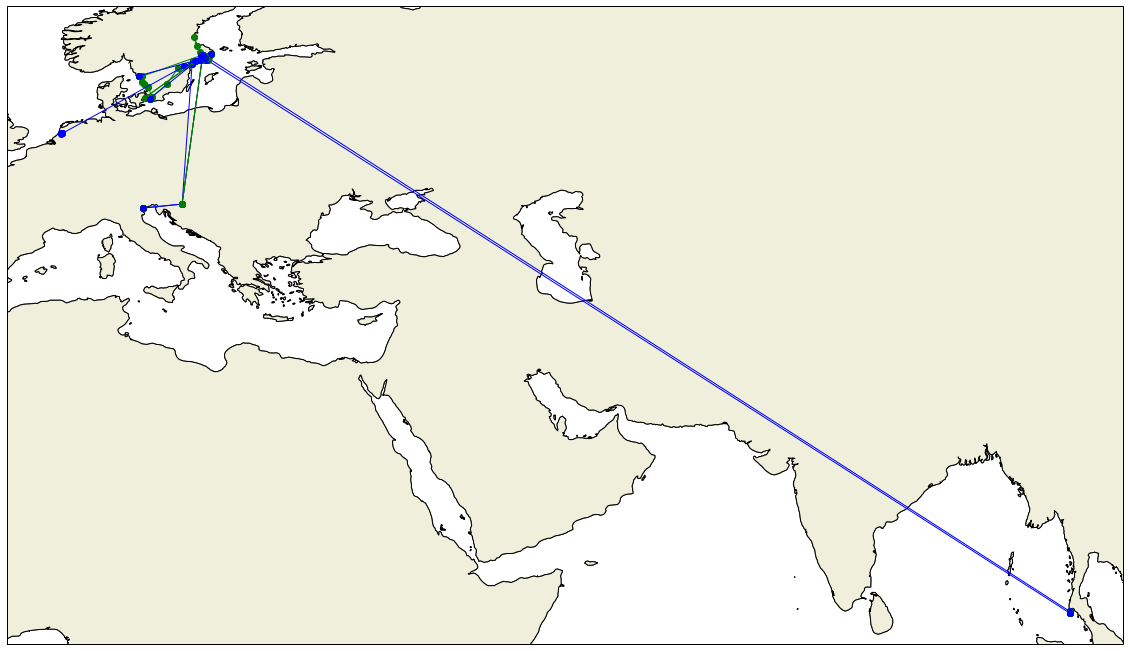

In [41]:
# Plot the user's trips with infer
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cartopy.feature.COLORS['land'])
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
for _, row in usertrips_infer.iterrows():
    if row.type == "missed":
        ax.scatter(row.longitude_o, row.latitude_o, c="red", marker='o')
    elif row.type == "infered":
        ax.plot([row.longitude_o,row.longitude_d], [row.latitude_o, row.latitude_d], linewidth=1, marker='o', color='blue', transform=ccrs.PlateCarree())
    else:
        ax.plot([row.longitude_o,row.longitude_d], [row.latitude_o, row.latitude_d], linewidth=1, marker='o', color='green', transform=ccrs.PlateCarree())
plt.show()